# Project: Improving Disaster Resilience

## US Counties Census Data - Clustering Counties

### 
### Disaster Resilience Project

### Data Used: US Census Consolidate Data for U.S. Counties, Standardized FIPS Data

Andrew Sommers

### Purpose

- Load the Combined US Census Data
- Create county clusters based on similar census characteristics


#### History 🗓️

   Date | Person | Details
   ---- | ------ | -------
 - 06/17/2023| Andrew Sommers| Create initial notebook
 - 08/25/2023| Andrew Sommers| Update documentation



### Importing Libraries

We start by importing the libraries required for this notebook, adding in the ACS API key, and creating the function `json_to_dataframe` which is the function used in all our notebooks that make a call to the API. This function converts the API response into a dataframe and a readable format.

In [1]:
#import requests # request http, api
import pandas as pd # tabluar data
#from functools import reduce
import numpy as np
import os

import matplotlib.pyplot as plt
plt.style.use('default')
%matplotlib inline

#import k means cluserting from sklearn
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')


pd.options.display.max_columns = None # show all columns in display
pd.options.display.max_rows = None # show all columns in display

In [2]:
# change the notebooks data source directory to the Disaster Resilience  Directory - change this for your local environment
# set the sourcing directory where the 'data folder is located; this is the raw data input files.  
# this notebook assumes data files are located in a 'Data' folder in the following path:
os.chdir('C:\\Users\\andre\\OneDrive\\Documents\\IndianaUniversity\\D592\\Project_Disaster_Resilience\\Data\\Tables')
FIPS_Table = pd.read_csv(f'FIPS_Prepared_Table.csv', dtype = str, skipinitialspace = True)
FIPS_Table.set_index("FIPS", inplace = True)
print('FIPS Table data load complete ',len(FIPS_Table))

FIPS Table data load complete  3143


In [3]:
FIPS_Table.head(3)

,STATE_CODE,STATE_FIPS,COUNTY_FIPS,COUNTY_NS,COUNTY_FULL_NAME,FIPS_CLASS_CODE,FUNCTION_STATUS,COUNTY,STATE
FIPS,,,,,,,,,
0500000US01001,AL,1,1,161526,Autauga County,H1,A,AUTAUGA,ALABAMA
0500000US01003,AL,1,3,161527,Baldwin County,H1,A,BALDWIN,ALABAMA
0500000US01005,AL,1,5,161528,Barbour County,H1,A,BARBOUR,ALABAMA


In [4]:
# change the notebooks data source directory to the Disaster Resilience  Directory - change this for your local environment
# set the sourcing directory where the 'data folder is located; this is the raw data input files.  
# this notebook assumes data files are located in a 'Data' folder in the following path:
os.chdir('C:\\Users\\andre\\OneDrive\\Documents\\IndianaUniversity\\D592\\Project_Disaster_Resilience\\Data\\usCensus')
US_Census_County_Data = pd.read_csv(f'US_Census_All_Counties.csv', dtype = str, skipinitialspace = True)
US_Census_County_Data.drop(['STATE_CODE', 'STATE_FIPS', 'COUNTY_FIPS', 'COUNTY_NS', 'COUNTY_FULL_NAME', 'FIPS_CLASS_CODE', 'FUNCTION_STATUS', 'COUNTY', 'STATE'], axis=1, inplace = True)

US_Census_County_Data.set_index("FIPS", inplace = True)
print('US Census data load complete ', len(US_Census_County_Data))

US Census data load complete  3143


In [5]:
US_Census_County_Data.head(3)

,POPULATION,POP_DENSITY,PCT_URBAN,MEDIAN_INCOME
FIPS,,,,
0500000US01001,58239,91.8,0.59,31338.0
0500000US01003,227131,114.6,0.672,35140.0
0500000US01005,25259,31.0,0.351,20704.0


### unsupervised clustering using k-means
##### https://towardsdatascience.com/how-to-perform-kmeans-clustering-using-python-7cc296cec092

In [6]:
def find_best_clusters(df, maximum_K):
    
    clusters_centers = []
    k_values = []
    
    for k in range(1, maximum_K):
        
        kmeans_model = KMeans(n_clusters = k)
        kmeans_model.fit(df)
        
        clusters_centers.append(kmeans_model.inertia_)
        k_values.append(k)
        
    
    return clusters_centers, k_values

In [7]:
def generate_elbow_plot(clusters_centers, k_values):
    
    figure = plt.subplots(figsize = (12, 6))
    plt.plot(k_values, clusters_centers, 'o-', color = 'orange')
    plt.xlabel("Number of Clusters (K)")
    plt.ylabel("Cluster Inertia")
    plt.title("Elbow Plot of KMeans")
    plt.show()

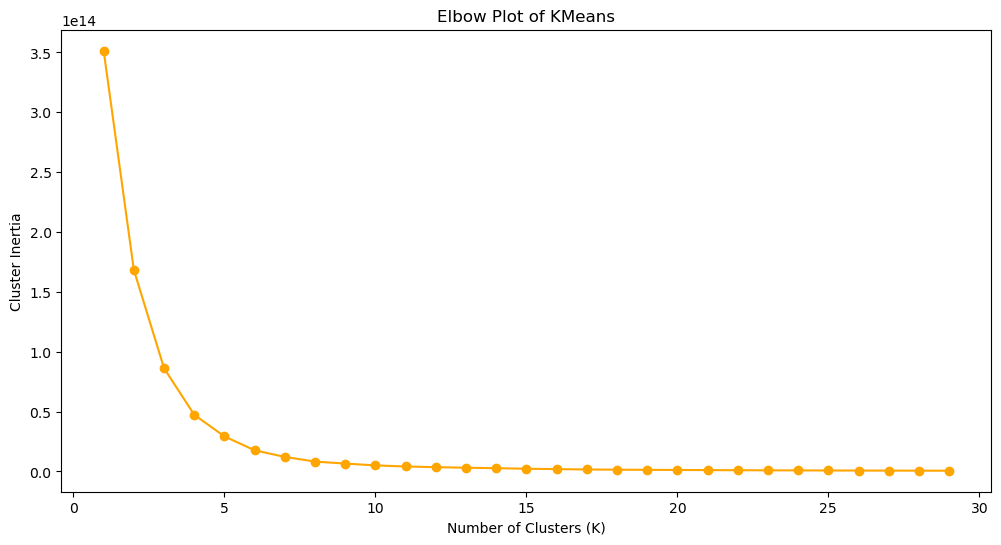

In [8]:
clusters_centers, k_values = find_best_clusters(US_Census_County_Data, 30)
generate_elbow_plot(clusters_centers, k_values)

In [9]:
kmeans_model = KMeans(n_clusters = 15)
kmeans_model.fit(US_Census_County_Data)
US_Census_County_Output = US_Census_County_Data.copy()
US_Census_County_Output["cluster"] = kmeans_model.labels_
extract = FIPS_Table.STATE
US_Census_County_Output["State"] = extract
extract = FIPS_Table.COUNTY
US_Census_County_Output["County"] = extract
print("county clusters completed for ", len(US_Census_County_Output))

county clusters completed for  3143


In [10]:
US_Census_County_Output = US_Census_County_Output.astype({'State':'string'})
US_Census_County_Output['State'].str.strip()
US_Census_County_Output = US_Census_County_Output.astype({'County':'string'})
US_Census_County_Output['County'].str.strip()
US_Census_County_Output.head(3)

,POPULATION,POP_DENSITY,PCT_URBAN,MEDIAN_INCOME,cluster,State,County
FIPS,,,,,,,
0500000US01001,58239,91.8,0.59,31338.0,11,ALABAMA,AUTAUGA
0500000US01003,227131,114.6,0.672,35140.0,13,ALABAMA,BALDWIN
0500000US01005,25259,31.0,0.351,20704.0,1,ALABAMA,BARBOUR


In [11]:
df1 = US_Census_County_Output[US_Census_County_Output['State'].str.contains("INDIANA")]
df1.head(3)

,POPULATION,POP_DENSITY,PCT_URBAN,MEDIAN_INCOME,cluster,State,County
FIPS,,,,,,,
0500000US18001,35685,101.4,0.366,33424.0,1,INDIANA,ADAMS
0500000US18003,381839,540.6,0.889,37105.0,4,INDIANA,ALLEN
0500000US18005,81759,188.7,0.705,41654.0,11,INDIANA,BARTHOLOMEW


In [12]:
df1 = US_Census_County_Output[US_Census_County_Output['cluster'] == 11] # manually enter the cluster of interest
os.chdir('C:\\Users\\andre\\OneDrive\\Documents\\IndianaUniversity\\D592\\Project_Disaster_Resilience\\Data\\usCensus')
df1.reset_index(inplace=True)
df1 = df1.rename(columns = {'index':'FIPS'})
df1.to_csv(f'US_Census_BartholomewCluster_All_Counties.csv', header=True, index=False)
print('end of cluster generation and save function', len(df1))

end of cluster generation and save function 607


In [29]:
df1.head(3)

,FIPS,POPULATION,PCT_URBAN,AGRICULTURE,INDUSTRY,PROFESSIONAL,cluster,State,County
0,0500000US01001,58239,0.59,0.008,0.237,0.51,10,ALABAMA,AUTAUGA
1,0500000US01009,58884,0.093,0.018,0.341,0.435,10,ALABAMA,BLOUNT
2,0500000US01017,34834,0.488,0.023,0.402,0.399,10,ALABAMA,CHAMBERS


In [13]:
df2 = df1[df1['State'].str.contains("INDIANA")]
os.chdir('C:\\Users\\andre\\OneDrive\\Documents\\IndianaUniversity\\D592\\Project_Disaster_Resilience\\Data\\usCensus')
df2.to_csv(f'US_Census_BartholomewCluster_Indiana_Counties.csv', header=True, index=False)
print('end of cluster generation and save function', len(df2))

end of cluster generation and save function 21


In [14]:
# output the normalized data to a csv file
os.chdir('C:\\Users\\andre\\OneDrive\\Documents\\IndianaUniversity\\D592\\Project_Disaster_Resilience\\Data\\usCensus')
US_Census_County_Output.reset_index(inplace=True)
US_Census_County_Output = US_Census_County_Output.rename(columns = {'index':'FIPS'})
US_Census_County_Output.to_csv(f'US_Census_AllClusters_All_Counties.csv', header=True, index=False)
print('end of cluster generation and save function', len(US_Census_County_Output))

end of cluster generation and save function 3143
